In [201]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import sys 
reload(sys)
import seaborn as sns
#set sns as a default for our graphs
sns.set()
sys.setdefaultencoding('utf8')
%matplotlib inline 

In [2]:
cd desktop

In [3]:
m_rates = pd.read_csv('state_marriage_rates.csv')

**Quick check of first five rows of data to inspect what we have**

In [4]:
m_rates.head()

,State,2016,2015,2014,2013,2012,2011,2010,2009,2008,...,2000,1999,1995,1990,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Alabama,7.1,7.4,7.8,7.8,8.2,8.4,8.2,8.3,8.6,...,10.1,10.8,9.8,10.6,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,7.1,7.4,7.5,7.3,7.2,7.8,8.0,7.8,8.4,...,8.9,8.6,9.0,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,5.9,5.9,5.8,5.4,5.6,5.7,5.9,5.6,6.0,...,7.5,8.2,8.8,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,9.9,10.0,10.1,9.8,10.9,10.4,10.8,10.7,10.6,...,15.4,14.8,14.4,15.3,NaN,NaN,NaN,NaN,NaN,NaN
4,California,6.5,6.2,6.4,6.5,6.0,5.8,5.8,5.8,6.7,...,5.8,6.4,6.3,7.9,NaN,NaN,NaN,NaN,NaN,NaN


**Columns 21-26 seem to be of no use to us, so we drop them using df.drop() method**

In [5]:
m_rates = m_rates.drop(m_rates.columns[[21,22,23,24,25,26]], axis = 1)

**Columns 21-26 have been removed from the DataFrame**

In [6]:
m_rates.head()

,State,2016,2015,2014,2013,2012,2011,2010,2009,2008,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
0,Alabama,7.1,7.4,7.8,7.8,8.2,8.4,8.2,8.3,8.6,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
1,Alaska,7.1,7.4,7.5,7.3,7.2,7.8,8.0,7.8,8.4,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
2,Arizona,5.9,5.9,5.8,5.4,5.6,5.7,5.9,5.6,6.0,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
3,Arkansas,9.9,10.0,10.1,9.8,10.9,10.4,10.8,10.7,10.6,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
4,California,6.5,6.2,6.4,6.5,6.0,5.8,5.8,5.8,6.7,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9


**Quick check of what columns have missing values, using the isnull() and sum() functions**

In [7]:
m_rates.isnull().sum()

State    0
2016     0
2015     0
2014     1
2013     1
2012     0
2011     0
2010     0
2009     0
2008     0
2007     0
2006     1
2005     0
2004     0
2003     1
2002     1
2001     1
2000     1
1999     0
1995     0
1990     0
dtype: int64

**We can use the fillna() function to fill in the missing values<br> method = 'backfill' to replace missing vlaues with previous value, and inplace = True to update our dataset**

In [8]:
m_rates.fillna(method='backfill', inplace=True)
m_rates.isnull().sum()

State    0
2016     0
2015     0
2014     0
2013     0
2012     0
2011     0
2010     0
2009     0
2008     0
2007     0
2006     0
2005     0
2004     0
2003     0
2002     0
2001     0
2000     0
1999     0
1995     0
1990     0
dtype: int64

**Comparing marriage rates of Arizona vs Alabama**
- We first store the 'State' row we want to a variable
- Then create an empty list to loop through the row using iloc and skipping the name of state using [1:] and append all elements to list
- We then use the reverse() function on the newly created list to match our data to years x - axis


In [80]:
arizona = m_rates[m_rates['State'] == 'Arizona']
a_rate = []
for rate in arizona.iloc[0][1:21]:
    a_rate.append(rate)

In [132]:
#a_rate.reverse() 

In [50]:
alabama = m_rates[m_rates['State'] == 'Alabama']
years = []
for year in alabama.columns[1:]:
    years.append(year)


['2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002',
 '2001',
 '2000',
 '1999',
 '1995',
 '1990']

In [53]:
#years.reverse()
years

['1990',
 '1995',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016']

In [45]:
rates = []
for rate in alabama.iloc[0][1:]:
    rates.append(rate)
rates

[7.1,
 7.4,
 7.8,
 7.8,
 8.2,
 8.4,
 8.2,
 8.3,
 8.6,
 8.9,
 9.2,
 9.2,
 9.4,
 9.6,
 9.9,
 9.4,
 10.1,
 10.8,
 9.8,
 10.6]

In [56]:
rates.reverse()
rates

[10.6,
 9.8,
 10.8,
 10.1,
 9.4,
 9.9,
 9.6,
 9.4,
 9.2,
 9.2,
 8.9,
 8.6,
 8.3,
 8.2,
 8.4,
 8.2,
 7.8,
 7.8,
 7.4,
 7.1]

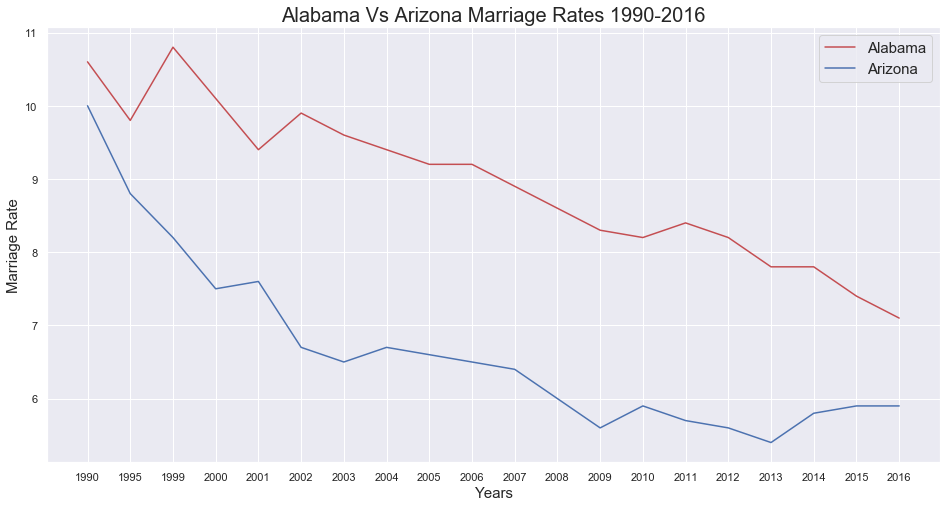

In [202]:
x = years
y = rates
z = a_rate

plt.figure(figsize=(16,8))
plt.plot(x,y,color = 'r', label= 'Alabama')
plt.plot(x,z,color='b', label= 'Arizona')
plt.title("Alabama Vs Arizona Marriage Rates 1990-2016", fontsize=20)
plt.xlabel('Years', fontsize = 15)
plt.ylabel('Marriage Rate', fontsize = 15)
plt.grid(True)
plt.legend(fontsize=15)

**Things to note:**
- Both states had their marriage rates go down from 1990-2016
- The marriage rate gap between the two states was greater in 2016 than in 1990
- From 1995-1999 Alabama's marriage rate went up, as Arizona's declined

### Comparing New York State to California 

In [113]:
ny = m_rates[m_rates['State'] == 'New York']
ny_rate = []
for rate in ny.iloc[0][1:]:
    ny_rate.append(rate)

In [124]:
#Reversed to match the x axis (years)
ny_rate

[8.6,
 8.0,
 7.3,
 7.1,
 7.6,
 7.3,
 6.8,
 6.8,
 6.8,
 6.9,
 6.8,
 6.6,
 6.5,
 6.5,
 6.9,
 7.0,
 6.9,
 6.7,
 7.1,
 7.5]

In [119]:
ca =  m_rates[m_rates['State'] == 'California']
ca_rate = []
for rate in ca.iloc[0][1:]:
    ca_rate.append(rate)

In [123]:
ca_rate

[7.9,
 6.3,
 6.4,
 5.8,
 6.5,
 6.2,
 6.1,
 6.4,
 6.4,
 6.3,
 6.2,
 6.7,
 5.8,
 5.8,
 5.8,
 6.0,
 6.5,
 6.4,
 6.2,
 6.5]

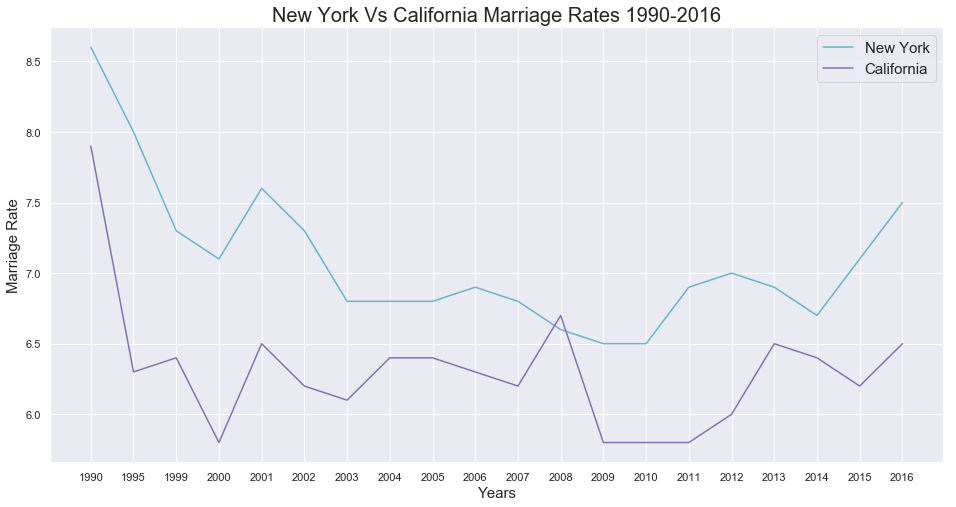

In [203]:
x = years
y = ny_rate
z = ca_rate

plt.figure(figsize=(16,8))
plt.plot(x,y,color = 'c', label= 'New York')
plt.plot(x,z,color='m', label= 'California')
plt.title("New York Vs California Marriage Rates 1990-2016", fontsize=20)
plt.xlabel('Years', fontsize = 15)
plt.ylabel('Marriage Rate', fontsize = 15)
plt.grid(True)
plt.legend(fontsize=15)

**Things to note:**
- Both states had their marriage rates go down from 1990-2016
- In 2008 California and New York had a very similar marriage rate between 6.5 - 7.0
- The gap between marriage rates is greater in 2016 than the observed rate between the two in 1990

### Checking where marriage rates dropped the most and the where the change was at its lowest <br>
- Create a variable for start year and end year for data
- Create a new variable to store the difference
- Create a new column that holds the difference for each state
- Sort the values to get highest change and lowest change
- Create two variables storing the top 10 of each category
- Plot to see results 

In [151]:
year_1990 = m_rates['1990']
year_1990.head()

0    10.6
1    10.2
2    10.0
3    15.3
4     7.9
Name: 1990, dtype: float64

In [152]:
year_2016 = m_rates['2016']
year_2016.head()

0    7.1
1    7.1
2    5.9
3    9.9
4    6.5
Name: 2016, dtype: float64

In [169]:
Difference = year_1990 - year_2016
m_rates['Difference'] = Difference
m_rates.head()
        

,State,2016,2015,2014,2013,2012,2011,2010,2009,2008,...,2005,2004,2003,2002,2001,2000,1999,1995,1990,Difference
0,Alabama,7.1,7.4,7.8,7.8,8.2,8.4,8.2,8.3,8.6,...,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6,3.5
1,Alaska,7.1,7.4,7.5,7.3,7.2,7.8,8.0,7.8,8.4,...,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2,3.1
2,Arizona,5.9,5.9,5.8,5.4,5.6,5.7,5.9,5.6,6.0,...,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0,4.1
3,Arkansas,9.9,10.0,10.1,9.8,10.9,10.4,10.8,10.7,10.6,...,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3,5.4
4,California,6.5,6.2,6.4,6.5,6.0,5.8,5.8,5.8,6.7,...,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9,1.4


In [174]:
top_diff = m_rates.sort_values(by='Difference', ascending = False).head(10)
top_diff

,State,2016,2015,2014,2013,2012,2011,2010,2009,2008,...,2005,2004,2003,2002,2001,2000,1999,1995,1990,Difference
28,Nevada,28.4,31.0,31.9,32.3,35.1,36.9,38.3,40.3,42.3,...,57.4,62.1,63.9,67.4,69.6,72.2,82.3,85.2,99.0,70.6
40,South Carolina,6.6,7.5,7.6,7.1,7.4,7.2,7.4,7.3,7.3,...,8.3,8.2,9.0,9.3,9.9,10.6,10.2,11.9,15.9,9.3
17,Kentucky,7.4,7.2,6.9,7.3,7.2,7.5,7.4,7.6,7.9,...,8.7,8.8,9.1,9.0,9.0,9.8,10.9,12.2,13.5,6.1
12,Idaho,8.1,8.2,8.4,8.2,8.2,8.6,8.8,8.9,9.5,...,10.5,10.8,10.9,11.0,11.2,10.8,12.1,13.1,13.9,5.8
3,Arkansas,9.9,10.0,10.1,9.8,10.9,10.4,10.8,10.7,10.6,...,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3,5.4
42,Tennessee,8.6,8.5,8.4,8.4,8.8,9.0,8.8,8.4,9.4,...,10.9,11.4,11.9,13.1,13.5,15.5,14.7,15.5,13.9,5.3
46,Virginia,7.0,7.0,6.7,6.7,6.8,6.8,6.8,6.9,7.2,...,8.2,8.3,8.4,8.6,8.8,8.8,9.2,10.2,11.4,4.4
2,Arizona,5.9,5.9,5.8,5.4,5.6,5.7,5.9,5.6,6.0,...,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0,4.1
41,South Dakota,7.2,7.2,7.1,7.0,7.5,7.5,7.3,7.3,7.7,...,8.4,8.4,8.4,8.8,8.9,9.4,9.1,9.9,11.1,3.9
36,Oklahoma,6.7,7.4,7.1,7.1,6.9,6.9,7.2,6.9,7.1,...,7.3,6.5,7.2,7.1,7.5,7.6,6.8,8.6,10.6,3.9


Text(0.5,1,'Top 10 Marriage Rate Decreases From 1990-2016')

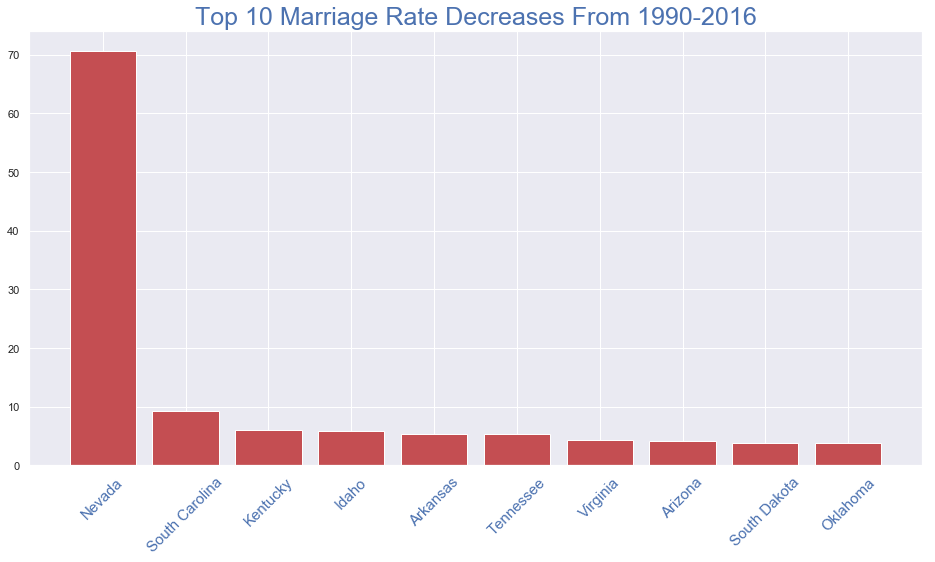

In [229]:
x = top_diff['State']
y = top_diff['Difference']

plt.figure(figsize=(16,8))
plt.bar(x,y,color='r')
plt.xticks(x, top_diff['State'], rotation = 45, color='b', fontsize=15)
plt.title("Top 10 Marriage Rate Decreases From 1990-2016",color='b',fontsize=25)

Text(0.5,1,'Top 9 Marriage Rate Decreases From 1990-2016(Minus top: Nevada)')

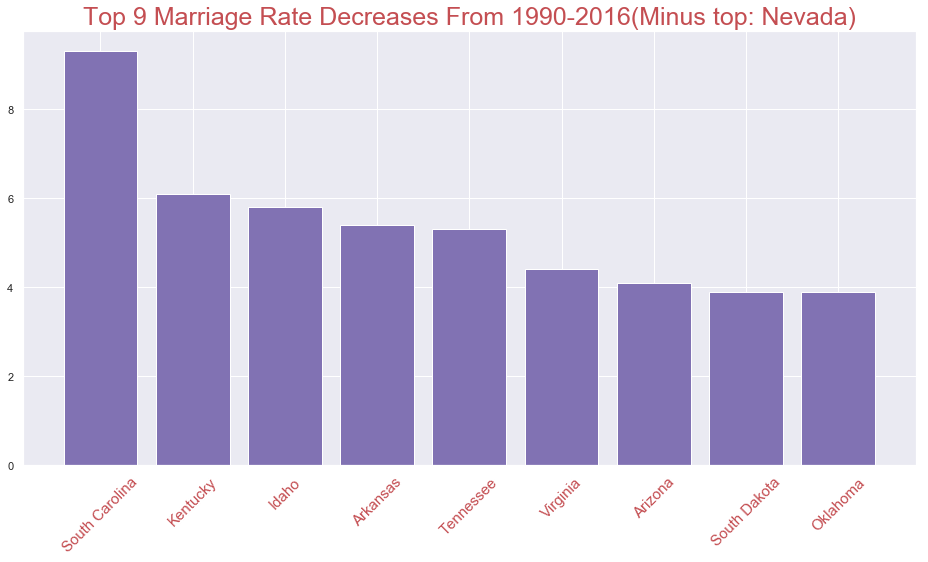

In [230]:
x = top_diff['State'][1:]
y = top_diff['Difference'][1:]

plt.figure(figsize=(16,8))
plt.bar(x,y,color='m')
plt.xticks(x, top_diff['State'][1:], rotation = 45, fontsize = 15, color='r')
plt.title("Top 9 Marriage Rate Decreases From 1990-2016(Minus top: Nevada)",color='r',fontsize=25)

In [187]:
low_diff =  m_rates.sort_values(by='Difference', ascending = False).tail(10)
low_diff

,State,2016,2015,2014,2013,2012,2011,2010,2009,2008,...,2005,2004,2003,2002,2001,2000,1999,1995,1990,Difference
27,Nebraska,6.5,6.4,6.4,6.3,6.7,6.6,6.6,6.6,6.9,...,7.0,7.1,7.0,7.5,7.9,7.6,7.5,7.3,8.0,1.5
4,California,6.5,6.2,6.4,6.5,6.0,5.8,5.8,5.8,6.7,...,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9,1.4
39,Rhode Island,6.7,6.4,6.7,6.2,6.1,6.0,5.8,5.9,6.1,...,7.0,7.7,7.8,7.8,8.1,7.6,7.5,7.3,8.1,1.4
38,Pennsylvania,5.8,5.7,5.8,5.4,5.5,5.3,5.3,5.3,5.5,...,5.8,5.9,5.9,5.7,5.8,6.0,6.1,6.2,7.1,1.3
32,New York,7.5,7.1,6.7,6.9,7.0,6.9,6.5,6.5,6.6,...,6.8,6.8,6.8,7.3,7.6,7.1,7.3,8.0,8.6,1.1
48,West Virginia,6.4,6.6,6.7,6.6,7.0,7.2,6.7,6.7,7.1,...,7.4,7.5,7.5,8.1,7.9,8.7,7.5,6.1,7.2,0.8
33,North Carolina,7.0,7.0,6.9,6.5,6.6,6.7,6.6,6.6,6.9,...,7.3,7.3,7.4,7.7,7.4,8.2,8.5,8.4,7.8,0.8
26,Montana,7.8,8.0,7.9,7.4,7.8,7.8,7.4,7.3,7.6,...,7.4,7.5,7.2,7.1,7.1,7.3,7.4,7.6,8.6,0.8
11,Hawaii,15.6,15.9,17.7,16.3,17.5,17.6,17.6,17.2,19.1,...,22.6,22.6,22.0,20.8,19.6,20.6,18.9,15.7,16.4,0.8
8,District of Columbia,8.1,8.2,11.8,10.8,8.4,8.7,7.6,4.7,4.1,...,4.1,5.2,5.1,5.1,6.2,4.9,6.6,6.1,8.2,0.1


Text(0.5,1,'Top 10 Lowest Marriage Rate Change from 1990-2016')

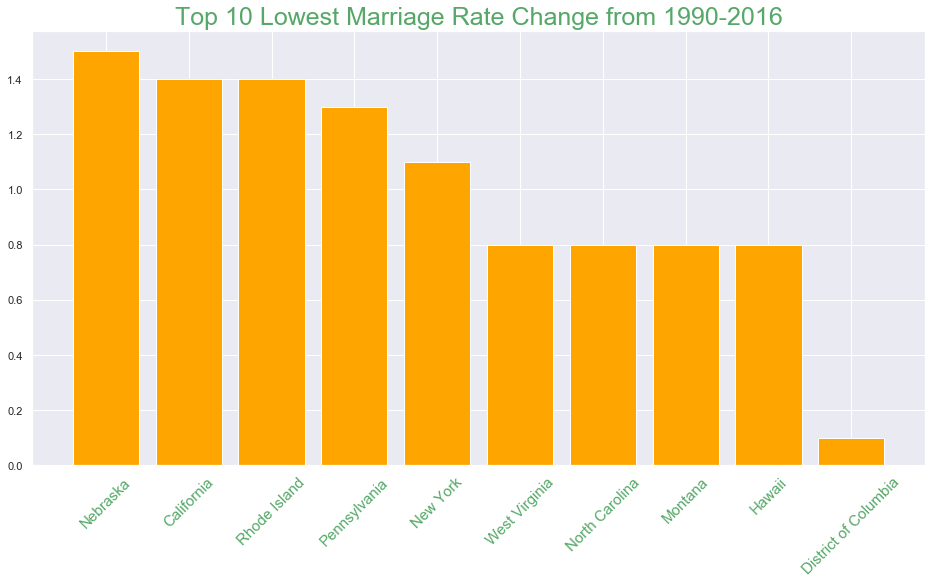

In [234]:
x = low_diff['State']
y = low_diff['Difference']

plt.figure(figsize=(16,8))
plt.bar(x,y,color='orange')
plt.xticks(x, low_diff['State'], rotation=45, color='g', fontsize = 15)
plt.title("Top 10 Lowest Marriage Rate Change from 1990-2016", color='g', fontsize=25)
